<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Factors Affecting the Value of Your Home

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in dataset
train_cleaned = pd.read_csv('../data/train_cleaned.csv')

In [3]:
# declare numerical and categorical columns
numerical_columns = train_cleaned.select_dtypes(include=['int', 'float']).columns
categorical_columns = train_cleaned.select_dtypes(include=['object']).columns

In [4]:
# dummify dataset
train_cleaned = pd.get_dummies(train_cleaned, columns=categorical_columns, drop_first=True)

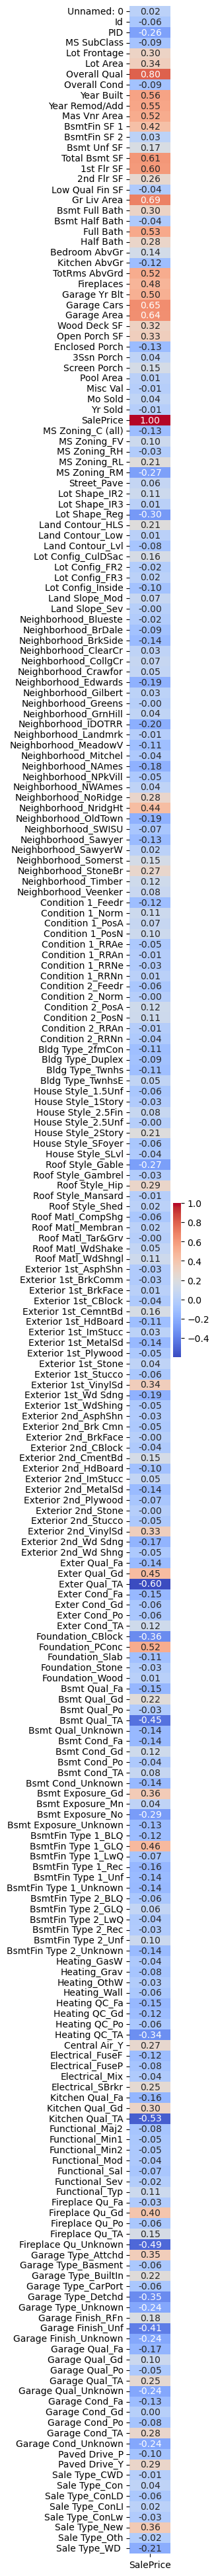

In [5]:
# display heatmap of all columns vs 'SalePrice'
plt.figure(figsize = (1, 50))
sns.heatmap(train_cleaned.corr()[['SalePrice']], cmap='coolwarm', fmt=".2f", annot=True);

In [6]:
# display correlation matrix
correlation_matrix = train_cleaned.corr()
correlation_matrix

Unnamed: 0        Id       PID  MS SubClass  Lot Frontage  \
Unnamed: 0         1.000000  0.007221 -0.017721    -0.050034     -0.000747   
Id                 0.007221  1.000000  0.184318     0.020281     -0.022308   
PID               -0.017721  0.184318  1.000000     0.011182     -0.062687   
MS SubClass       -0.050034  0.020281  0.011182     1.000000     -0.351806   
Lot Frontage      -0.000747 -0.022308 -0.062687    -0.351806      1.000000   
...                     ...       ...       ...          ...           ...   
Sale Type_ConLI    0.032370 -0.045419 -0.013296    -0.013967      0.010203   
Sale Type_ConLw    0.024460  0.000577  0.037195    -0.003744     -0.012912   
Sale Type_New     -0.012576  0.103916 -0.148085    -0.054144      0.103840   
Sale Type_Oth     -0.028811 -0.026152  0.016436    -0.013967     -0.019248   
Sale Type_WD       0.038155 -0.050544  0.100961     0.053716     -0.064146   

                 Lot Area  Overall Qual  Overall Cond  Year Built  \
Unnamed: 0       0.015194     -0.002256     -0.018655    0.062156   
Id               0.004998     -0.056597     -0.022776   -0.079851   
PID             -0.010495     -0.273544      0.114102   -0.353622   
MS SubClass     -0.296340      0.034091     -0.051818    0.029963   
Lot Frontage     0.511801      0.166630     -0.057855    0.089574   
...                   ...           ...           ...         ...   
Sale Type_ConLI  0.002504      0.027556      0.017691    0.007043   
Sale Type_ConLw -0.009668     -0.040679     -0.001962   -0.051871   
Sale Type_New    0.076805      0.340100     -0.136402    0.328967   
Sale Type_Oth   -0.010859     -0.044678     -0.035895   -0.009567   
Sale Type_WD    -0.041424     -0.192496      0.150642   -0.185393   

                 Year Remod/Add  ...  Paved Drive_P  Paved Drive_Y  \
Unnamed: 0             0.009227  ...      -0.007037       0.045692   
Id                    -0.090618  ...       0.039032      -0.078246   
PID                   -0.176675  ...       0.118014      -0.248223   
MS SubClass            0.073183  ...      -0.038577      -0.027308   
Lot Frontage           0.071588  ...       0.012046       0.018037   
...                         ...  ...            ...            ...   
Sale Type_ConLI        0.040501  ...      -0.006235       0.014371   
Sale Type_ConLw       -0.058937  ...      -0.005090      -0.049635   
Sale Type_New          0.312190  ...      -0.040285       0.092848   
Sale Type_Oth         -0.039803  ...      -0.006235      -0.035749   
Sale Type_WD          -0.128086  ...       0.040925      -0.054387   

                 Sale Type_CWD  Sale Type_Con  Sale Type_ConLD  \
Unnamed: 0           -0.049776      -0.058170        -0.034151   
Id                    0.050117      -0.036257        -0.041051   
PID                   0.021357      -0.034635         0.040722   
MS SubClass          -0.026333       0.027577         0.067272   
Lot Frontage          0.001942      -0.028483         0.012085   
...                        ...            ...              ...   
Sale Type_ConLI      -0.003197      -0.001595        -0.004082   
Sale Type_ConLw      -0.002609      -0.001302        -0.003332   
Sale Type_New        -0.020653      -0.010306        -0.026370   
Sale Type_Oth        -0.003197      -0.001595        -0.004082   
Sale Type_WD         -0.185963      -0.092800        -0.237446   

                 Sale Type_ConLI  Sale Type_ConLw  Sale Type_New  \
Unnamed: 0              0.032370         0.024460      -0.012576   
Id                     -0.045419         0.000577       0.103916   
PID                    -0.013296         0.037195      -0.148085   
MS SubClass            -0.013967        -0.003744      -0.054144   
Lot Frontage            0.010203        -0.012912       0.103840   
...                          ...              ...            ...   
Sale Type_ConLI         1.000000        -0.001595      -0.012627   
Sale Type_ConLw        -0.001595         1.000000      -0.010306   
Sale 

In [7]:
# display correlations of each feature with 'SalePrice'
correlation_with_saleprice = correlation_matrix['SalePrice']
correlation_with_saleprice

Unnamed: 0         0.017101
Id                -0.061303
PID               -0.262649
MS SubClass       -0.085096
Lot Frontage       0.303704
                     ...   
Sale Type_ConLI    0.018866
Sale Type_ConLw   -0.030882
Sale Type_New      0.364618
Sale Type_Oth     -0.020975
Sale Type_WD      -0.206182
Name: SalePrice, Length: 243, dtype: float64

In [8]:
# sort correlations in descending order
sorted_correlation = correlation_with_saleprice.abs().sort_values(ascending=False)
sorted_correlation

SalePrice               1.000000
Overall Qual            0.795815
Gr Liv Area             0.691599
Garage Cars             0.649464
Garage Area             0.642596
                          ...   
Condition 2_Norm        0.003463
Garage Cond_Gd          0.002262
Land Slope_Sev          0.001085
Exterior 2nd_BrkFace    0.000743
Neighborhood_Greens     0.000482
Name: SalePrice, Length: 243, dtype: float64

In [9]:
# select top 21 features (including 'SalePrice')
top_21_features = sorted_correlation.index[:21]
top_21_features

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Exter Qual_TA',
       'Year Built', 'Year Remod/Add', 'Full Bath', 'Kitchen Qual_TA',
       'Foundation_PConc', 'TotRms AbvGrd', 'Mas Vnr Area', 'Garage Yr Blt',
       'Fireplace Qu_Unknown', 'Fireplaces', 'BsmtFin Type 1_GLQ',
       'Bsmt Qual_TA', 'Exter Qual_Gd'],
      dtype='object')

In [10]:
# filter df to include only the top 21 features
train_selected = train_cleaned.loc[:, top_21_features]
train_selected

SalePrice  Overall Qual  Gr Liv Area  Garage Cars  Garage Area  \
0        167300             6         1587          2.0        525.0   
1        219000             7         2267          2.0        498.0   
2        129000             5          864          2.0        720.0   
3        328000             7         2260          2.0        533.0   
4        290000             8         2501          3.0        751.0   
...         ...           ...          ...          ...          ...   
1533     319500             8         2100          3.0        786.0   
1534     139000             6         1196          1.0        297.0   
1535     181000             6         1309          2.0        484.0   
1536     106000             6          987          1.0        280.0   
1537     235000             7         1525          2.0        541.0   

      Total Bsmt SF  1st Flr SF  Exter Qual_TA  Year Built  Year Remod/Add  \
0            1587.0        1587           True        1971            1971   
1            1005.0        1262           True        1937            1980   
2             864.0         864           True        1950            2002   
3            1306.0        1306          False        1996            1997   
4            1242.0        1251          False        1995            1995   
...             ...         ...            ...         ...             ...   
1533          918.0         958          False        2007            2007   
1534         1196.0        1196           True        1956            1956   
1535         1040.0        1309           True        1974            1999   
1536          483.0         483           True        1970            1970   
1537         1525.0        1525          False        2000            2000   

      ...  Kitchen Qual_TA  Foundation_PConc  TotRms AbvGrd  Mas Vnr Area  \
0     ...             True             False              7         302.0   
1     ...             True             False              7           0.0   
2     ...            False             False              5           0.0   
3     ...            False              True              7           0.0   
4     ...            False              True              9         466.0   
...   ...              ...               ...            ...           ...   
1533  ...            False              True              8         120.0   
1534  ...             True             False              6          74.0   
1535  ...            False             False              5          99.0   
1536  ...             True             False              5         127.0   
1537  ...            False              True              6         244.0   

      Garage Yr Blt  Fireplace Qu_Unknown  Fireplaces  BsmtFin Type 1_GLQ  \
0            1971.0                 False           1               False   
1            1937.0                 False           2               False   
2            1980.0                  True           0               False   
3            1996.0                  True           0                True   
4            1995.0                 False           1               False   
...             ...                   ...         ...                 ...   
1533         2007.0                 False           2                True   
1534         1956.0                 False           1               False   
1535         1974.0                 False           1               False   
1536         1987.0                  True           0               False   
1537         2000.0                  True           0                True   

      Bsmt Qual_TA  Exter Qual_Gd  
0             True          False  
1             True          False  
2             True          False  
3            False           True  
4            False           True  
...            ...            ...  
1533         False          False  
1534         False          False  
1535          True          Fa

In [11]:
# convert columns with boolean datatype into integer datatype
boolean_columns = train_selected.select_dtypes(include=bool).columns
train_selected.loc[:, boolean_columns] = train_selected.loc[:, boolean_columns].astype(int)

In [12]:
train_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SalePrice             1538 non-null   int64  
 1   Overall Qual          1538 non-null   int64  
 2   Gr Liv Area           1538 non-null   int64  
 3   Garage Cars           1538 non-null   float64
 4   Garage Area           1538 non-null   float64
 5   Total Bsmt SF         1538 non-null   float64
 6   1st Flr SF            1538 non-null   int64  
 7   Exter Qual_TA         1538 non-null   int64  
 8   Year Built            1538 non-null   int64  
 9   Year Remod/Add        1538 non-null   int64  
 10  Full Bath             1538 non-null   int64  
 11  Kitchen Qual_TA       1538 non-null   int64  
 12  Foundation_PConc      1538 non-null   int64  
 13  TotRms AbvGrd         1538 non-null   int64  
 14  Mas Vnr Area          1538 non-null   float64
 15  Garage Yr Blt        

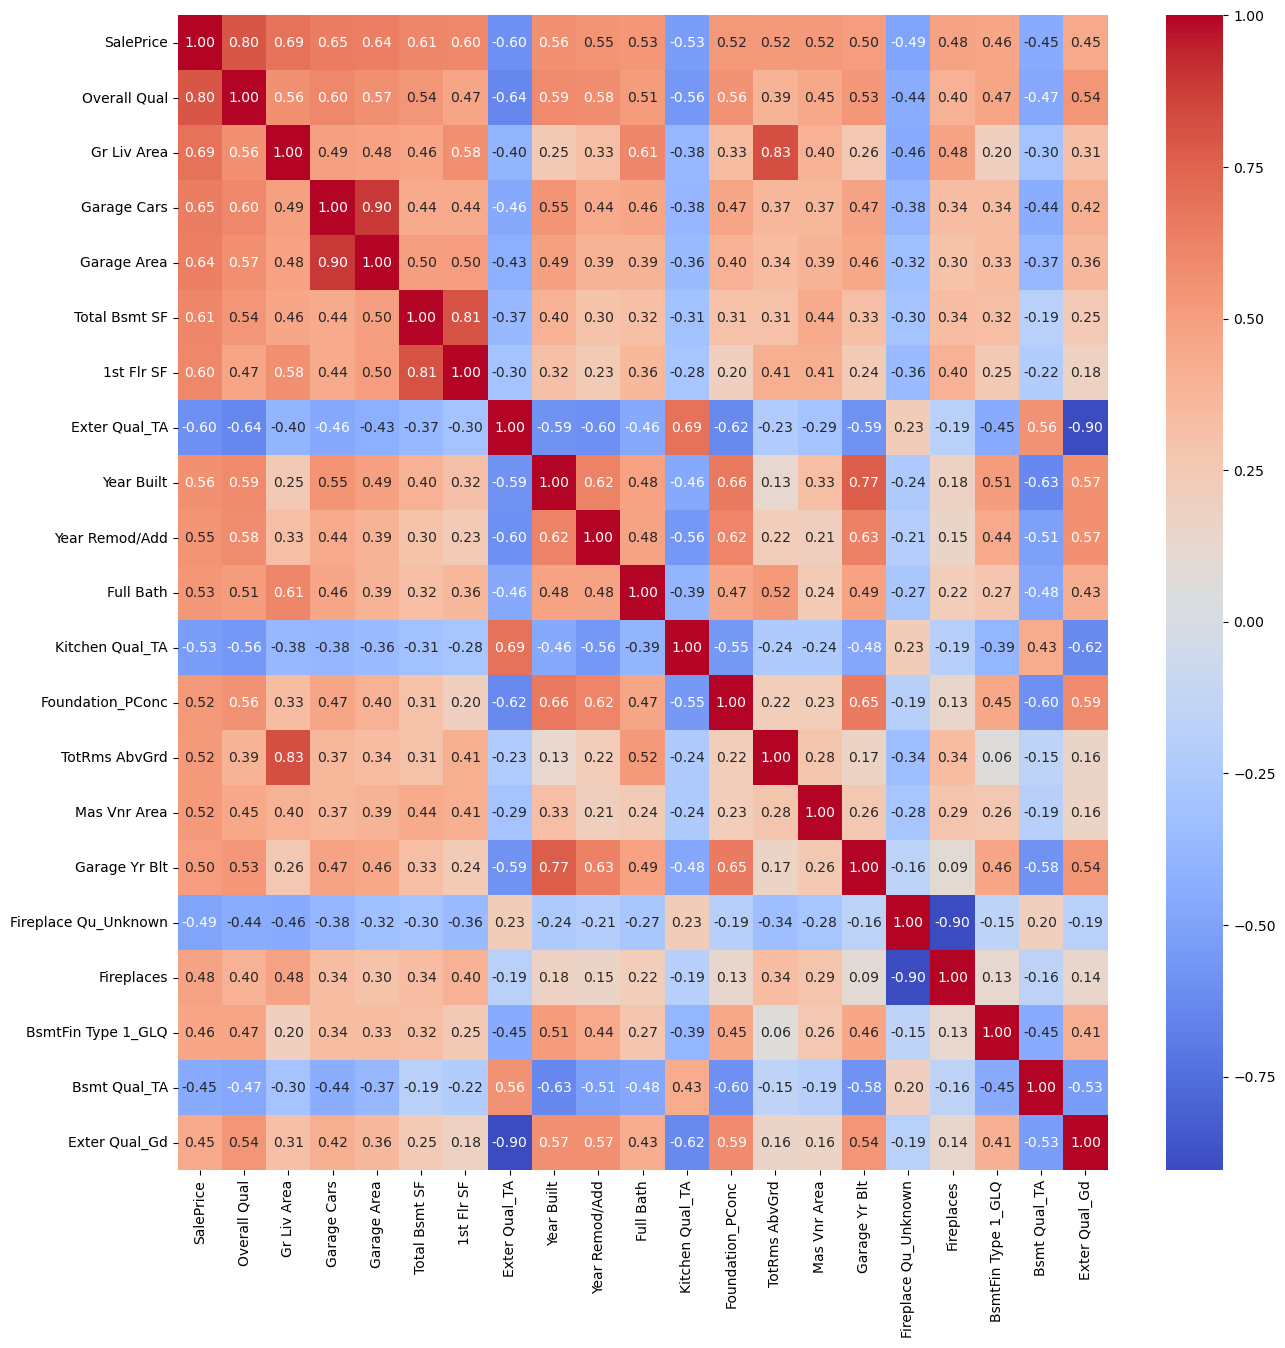

In [13]:
# display heatmap of selected columns
plt.figure(figsize = (15, 15))
sns.heatmap(train_selected.corr(), cmap='coolwarm', fmt=".2f", annot=True);

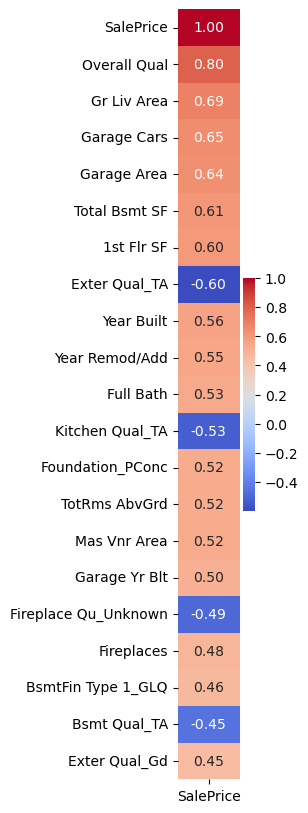

In [14]:
# display heatmap of selected columns 
plt.figure(figsize = (1, 10))
sns.heatmap(train_selected.corr()[['SalePrice']], cmap='coolwarm', fmt=".2f", annot=True);

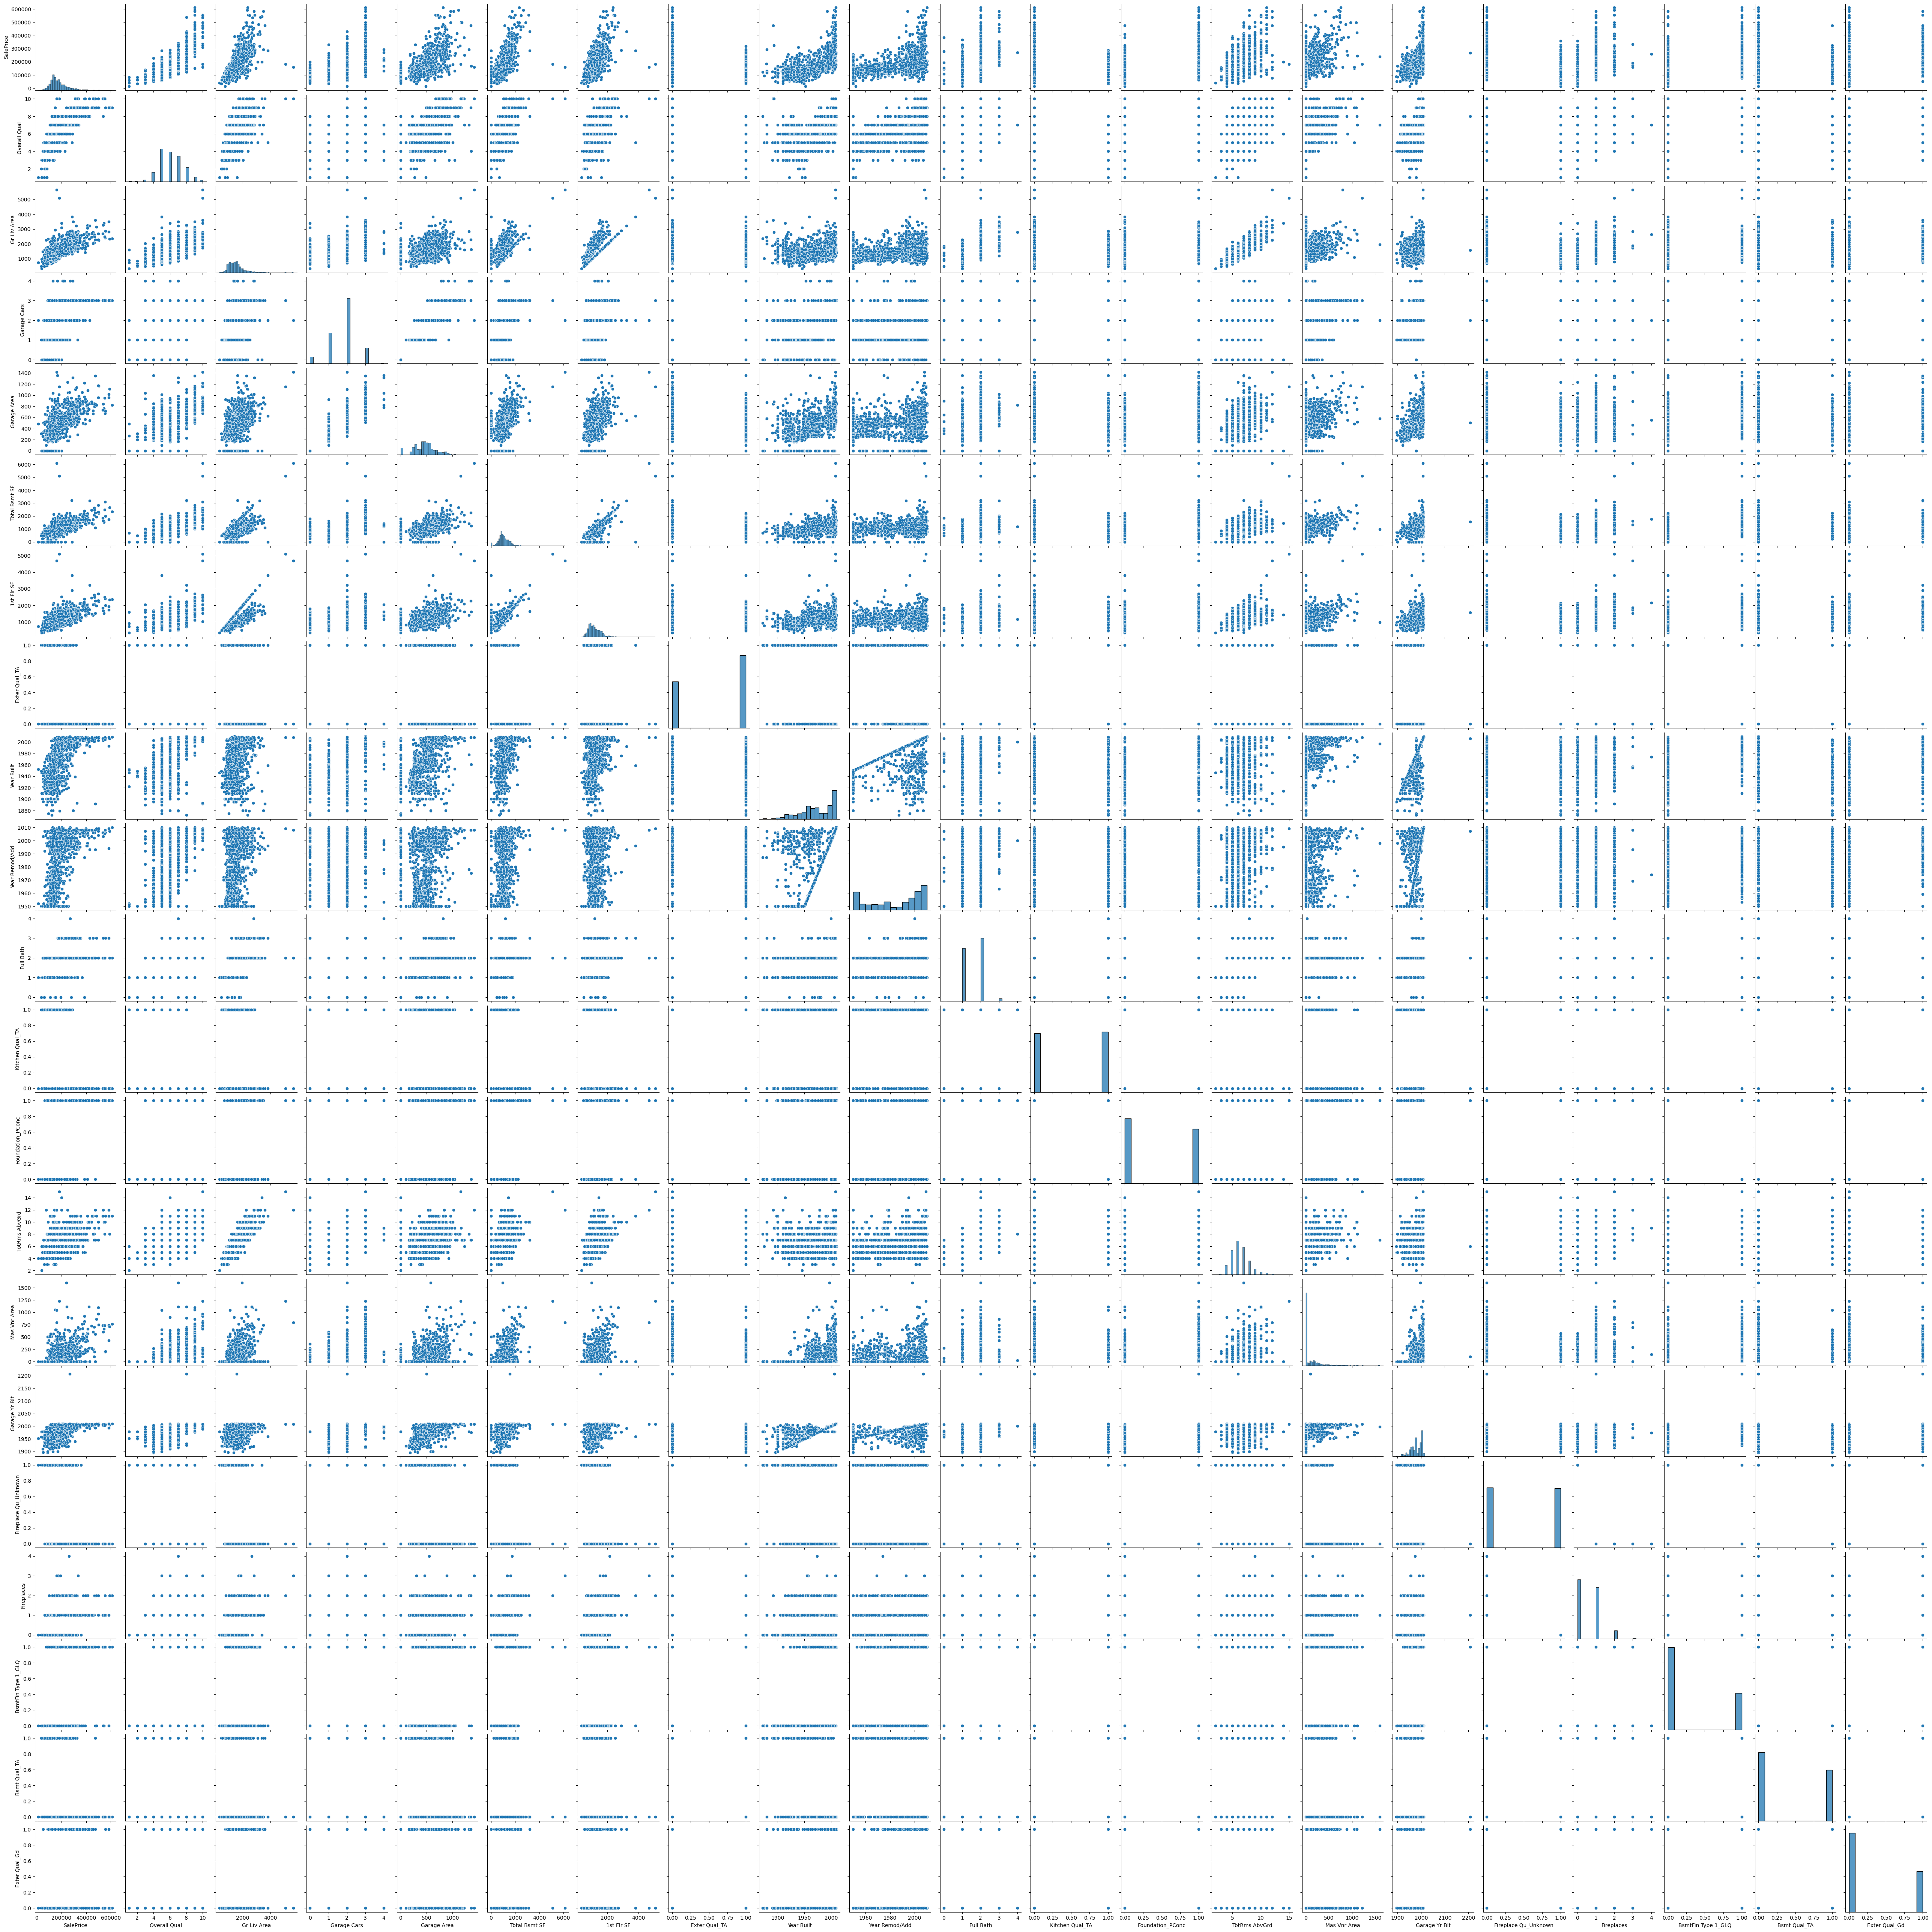

In [15]:
# display pairplots of selected columns
sns.pairplot(train_selected);

In [16]:
# calculate mean sale price
mean_saleprice = train_selected['SalePrice'].mean()
mean_saleprice

181061.9934980494

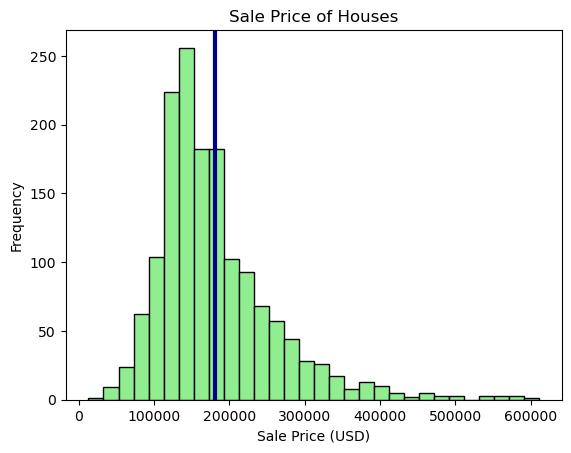

In [17]:
# display histogram of sale price of houses
plt.hist(train_selected['SalePrice'], bins=30, color='lightgreen', edgecolor='black')
plt.axvline(mean_saleprice, color='darkblue', linewidth=3, label='Mean SalePrice')
plt.title('Sale Price of Houses')
plt.xlabel('Sale Price (USD)')
plt.ylabel('Frequency');

Interpretation: Data for the sale price of houses is right-skewed. The average sale price is around $180,000.

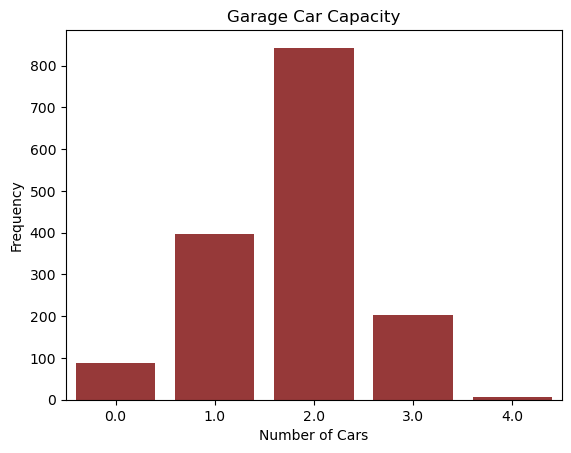

In [18]:
# display bar plot of garage car capacity
sns.barplot(x=train_selected['Garage Cars'].value_counts().index, y=train_cleaned['Garage Cars'].value_counts(), color='brown')
plt.title('Garage Car Capacity')
plt.xlabel('Number of Cars')
plt.ylabel('Frequency');

Interpretation: Most houses can hold two cars in their garage, then one car, and then three cars.

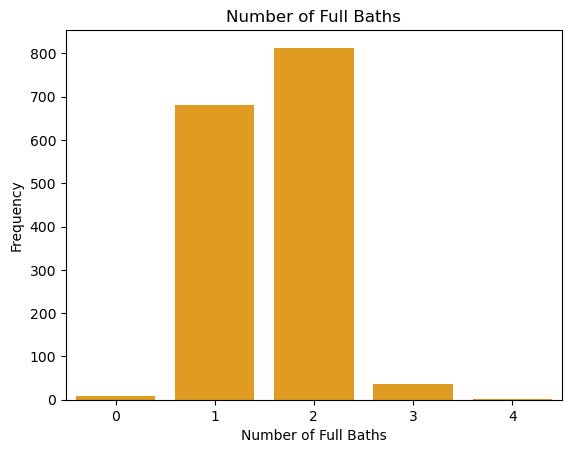

In [19]:
# display bar plot of number of full baths
sns.barplot(x=train_selected['Full Bath'].value_counts().index, y=train_cleaned['Full Bath'].value_counts(), color='orange')
plt.title('Number of Full Baths')
plt.xlabel('Number of Full Baths')
plt.ylabel('Frequency');

Interpretation: Most houses have one or two full baths.

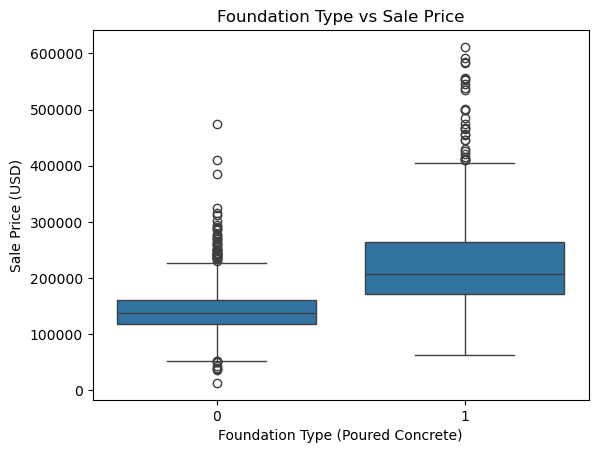

In [20]:
# display box plot of foundation type (poured concrete) vs sale price
sns.boxplot(data=train_selected, x='Foundation_PConc', y='SalePrice')
plt.title('Foundation Type vs Sale Price')
plt.xlabel('Foundation Type (Poured Concrete)')
plt.ylabel('Sale Price (USD)');

Interpretation: The poured concrete foundation type tends to lead to higher sale prices than any other foundation type.

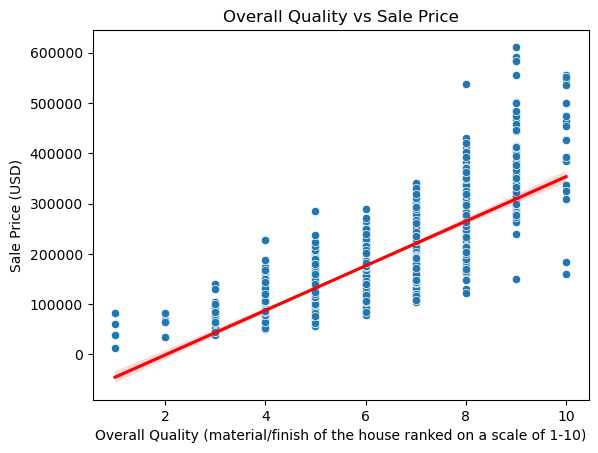

In [21]:
# display scatter plot of overall quality vs sale price
sns.scatterplot(train_selected, x='Overall Qual', y='SalePrice')
sns.regplot(train_selected, x='Overall Qual', y='SalePrice', scatter=False, color='red')
plt.title('Overall Quality vs Sale Price')
plt.xlabel('Overall Quality (material/finish of the house ranked on a scale of 1-10)')
plt.ylabel('Sale Price (USD)');

Interpretation: There is a strong positive correlation between overall quality and sale price of houses.

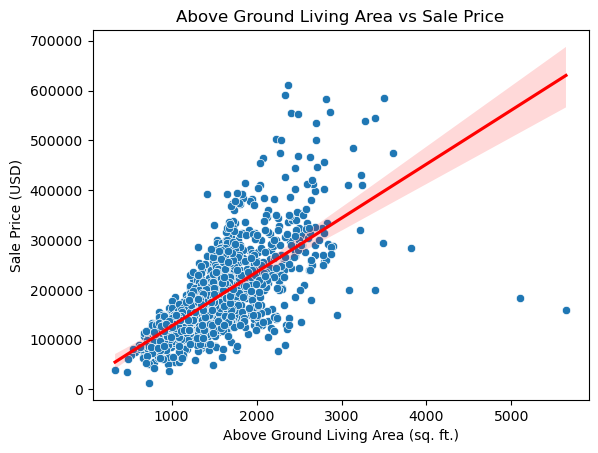

In [22]:
# display scatter plot of above ground living area vs sale price
sns.scatterplot(train_selected, x='Gr Liv Area', y='SalePrice')
sns.regplot(train_selected, x='Gr Liv Area', y='SalePrice', scatter=False, color='red')
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Above Ground Living Area (sq. ft.)')
plt.ylabel('Sale Price (USD)');

Interpretation: There is a strong positive correlation between above ground living area and sale price of houses.

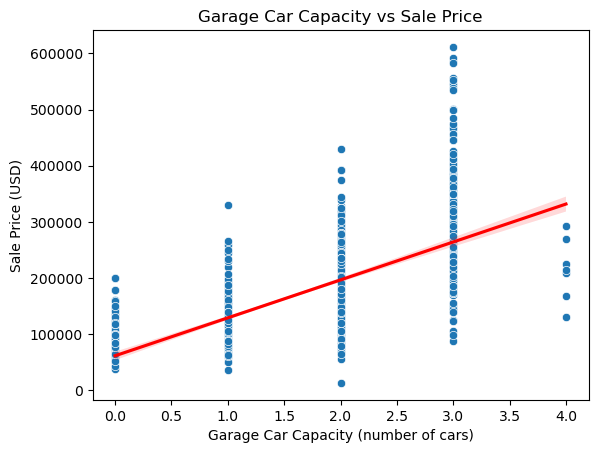

In [23]:
# display scatter plot of garage car capacity vs sale price
sns.scatterplot(train_selected, x='Garage Cars', y='SalePrice')
sns.regplot(train_selected, x='Garage Cars', y='SalePrice', scatter=False, color='red')
plt.title('Garage Car Capacity vs Sale Price')
plt.xlabel('Garage Car Capacity (number of cars)')
plt.ylabel('Sale Price (USD)');

Interpretation: There is a strong positive correlation between garage car capacity and sale price of houses.

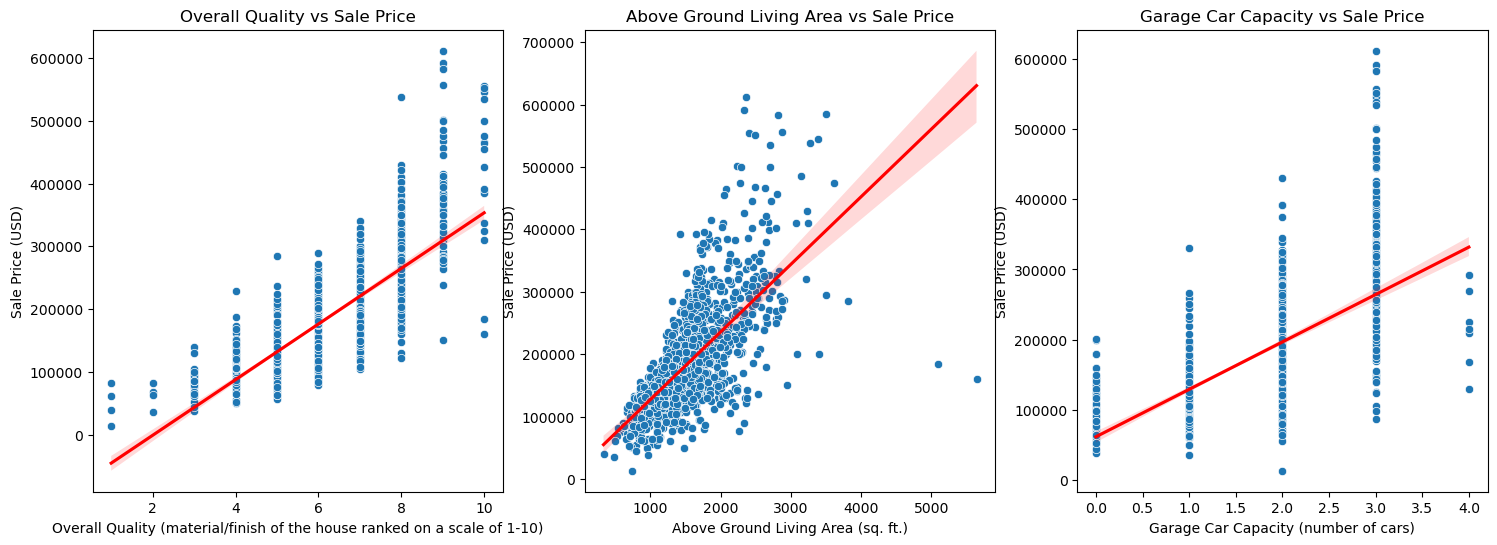

In [24]:
# display subplots of previously created scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# overall quality vs sale price
sns.scatterplot(train_selected, x='Overall Qual', y='SalePrice', ax=axes[0])
sns.regplot(train_selected, x='Overall Qual', y='SalePrice', scatter=False, color='red', ax=axes[0])
axes[0].set_title('Overall Quality vs Sale Price')
axes[0].set_xlabel('Overall Quality (material/finish of the house ranked on a scale of 1-10)')
axes[0].set_ylabel('Sale Price (USD)')

# above ground living area vs sale price
sns.scatterplot(train_selected, x='Gr Liv Area', y='SalePrice', ax=axes[1])
sns.regplot(train_selected, x='Gr Liv Area', y='SalePrice', scatter=False, color='red', ax=axes[1])
axes[1].set_title('Above Ground Living Area vs Sale Price')
axes[1].set_xlabel('Above Ground Living Area (sq. ft.)')
axes[1].set_ylabel('Sale Price (USD)')

# garage car capacity vs sale price
sns.scatterplot(train_selected, x='Garage Cars', y='SalePrice', ax=axes[2])
sns.regplot(train_selected, x='Garage Cars', y='SalePrice', scatter=False, color='red', ax=axes[2])
axes[2].set_title('Garage Car Capacity vs Sale Price')
axes[2].set_xlabel('Garage Car Capacity (number of cars)')
axes[2].set_ylabel('Sale Price (USD)');

Interpretation: There is a strong positive correlation between overall quality and sale price of houses, between above ground living area and sale price of houses, and between garage car capacity and sale price of houses.

In [25]:
# save selected columns dataset
train_selected.to_csv('../data/train_selected.csv', index=False)